In [15]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline 


In [16]:
# --- 1. Data Loading, Cleaning, and Outlier Handling ---
df = pd.read_csv('housing.csv')
df_cleaned = df[df['price'] > 0.0].copy()


/var/folders/tr/jb5rcznx5cx_5ggz3m54mxsm0000gn/T/ipykernel_4316/2678591819.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bedroom_counts.index, y=bedroom_counts.values, ax=axes[1, 0], palette='viridis')
/var/folders/tr/jb5rcznx5cx_5ggz3m54mxsm0000gn/T/ipykernel_4316/2678591819.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_bedrooms.index, y=avg_price_bedrooms.values, ax=axes[1, 1], palette='magma')
/var/folders/tr/jb5rcznx5cx_5ggz3m54mxsm0000gn/T/ipykernel_4316/2678591819.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns

(0.0, 16908.519999999997)

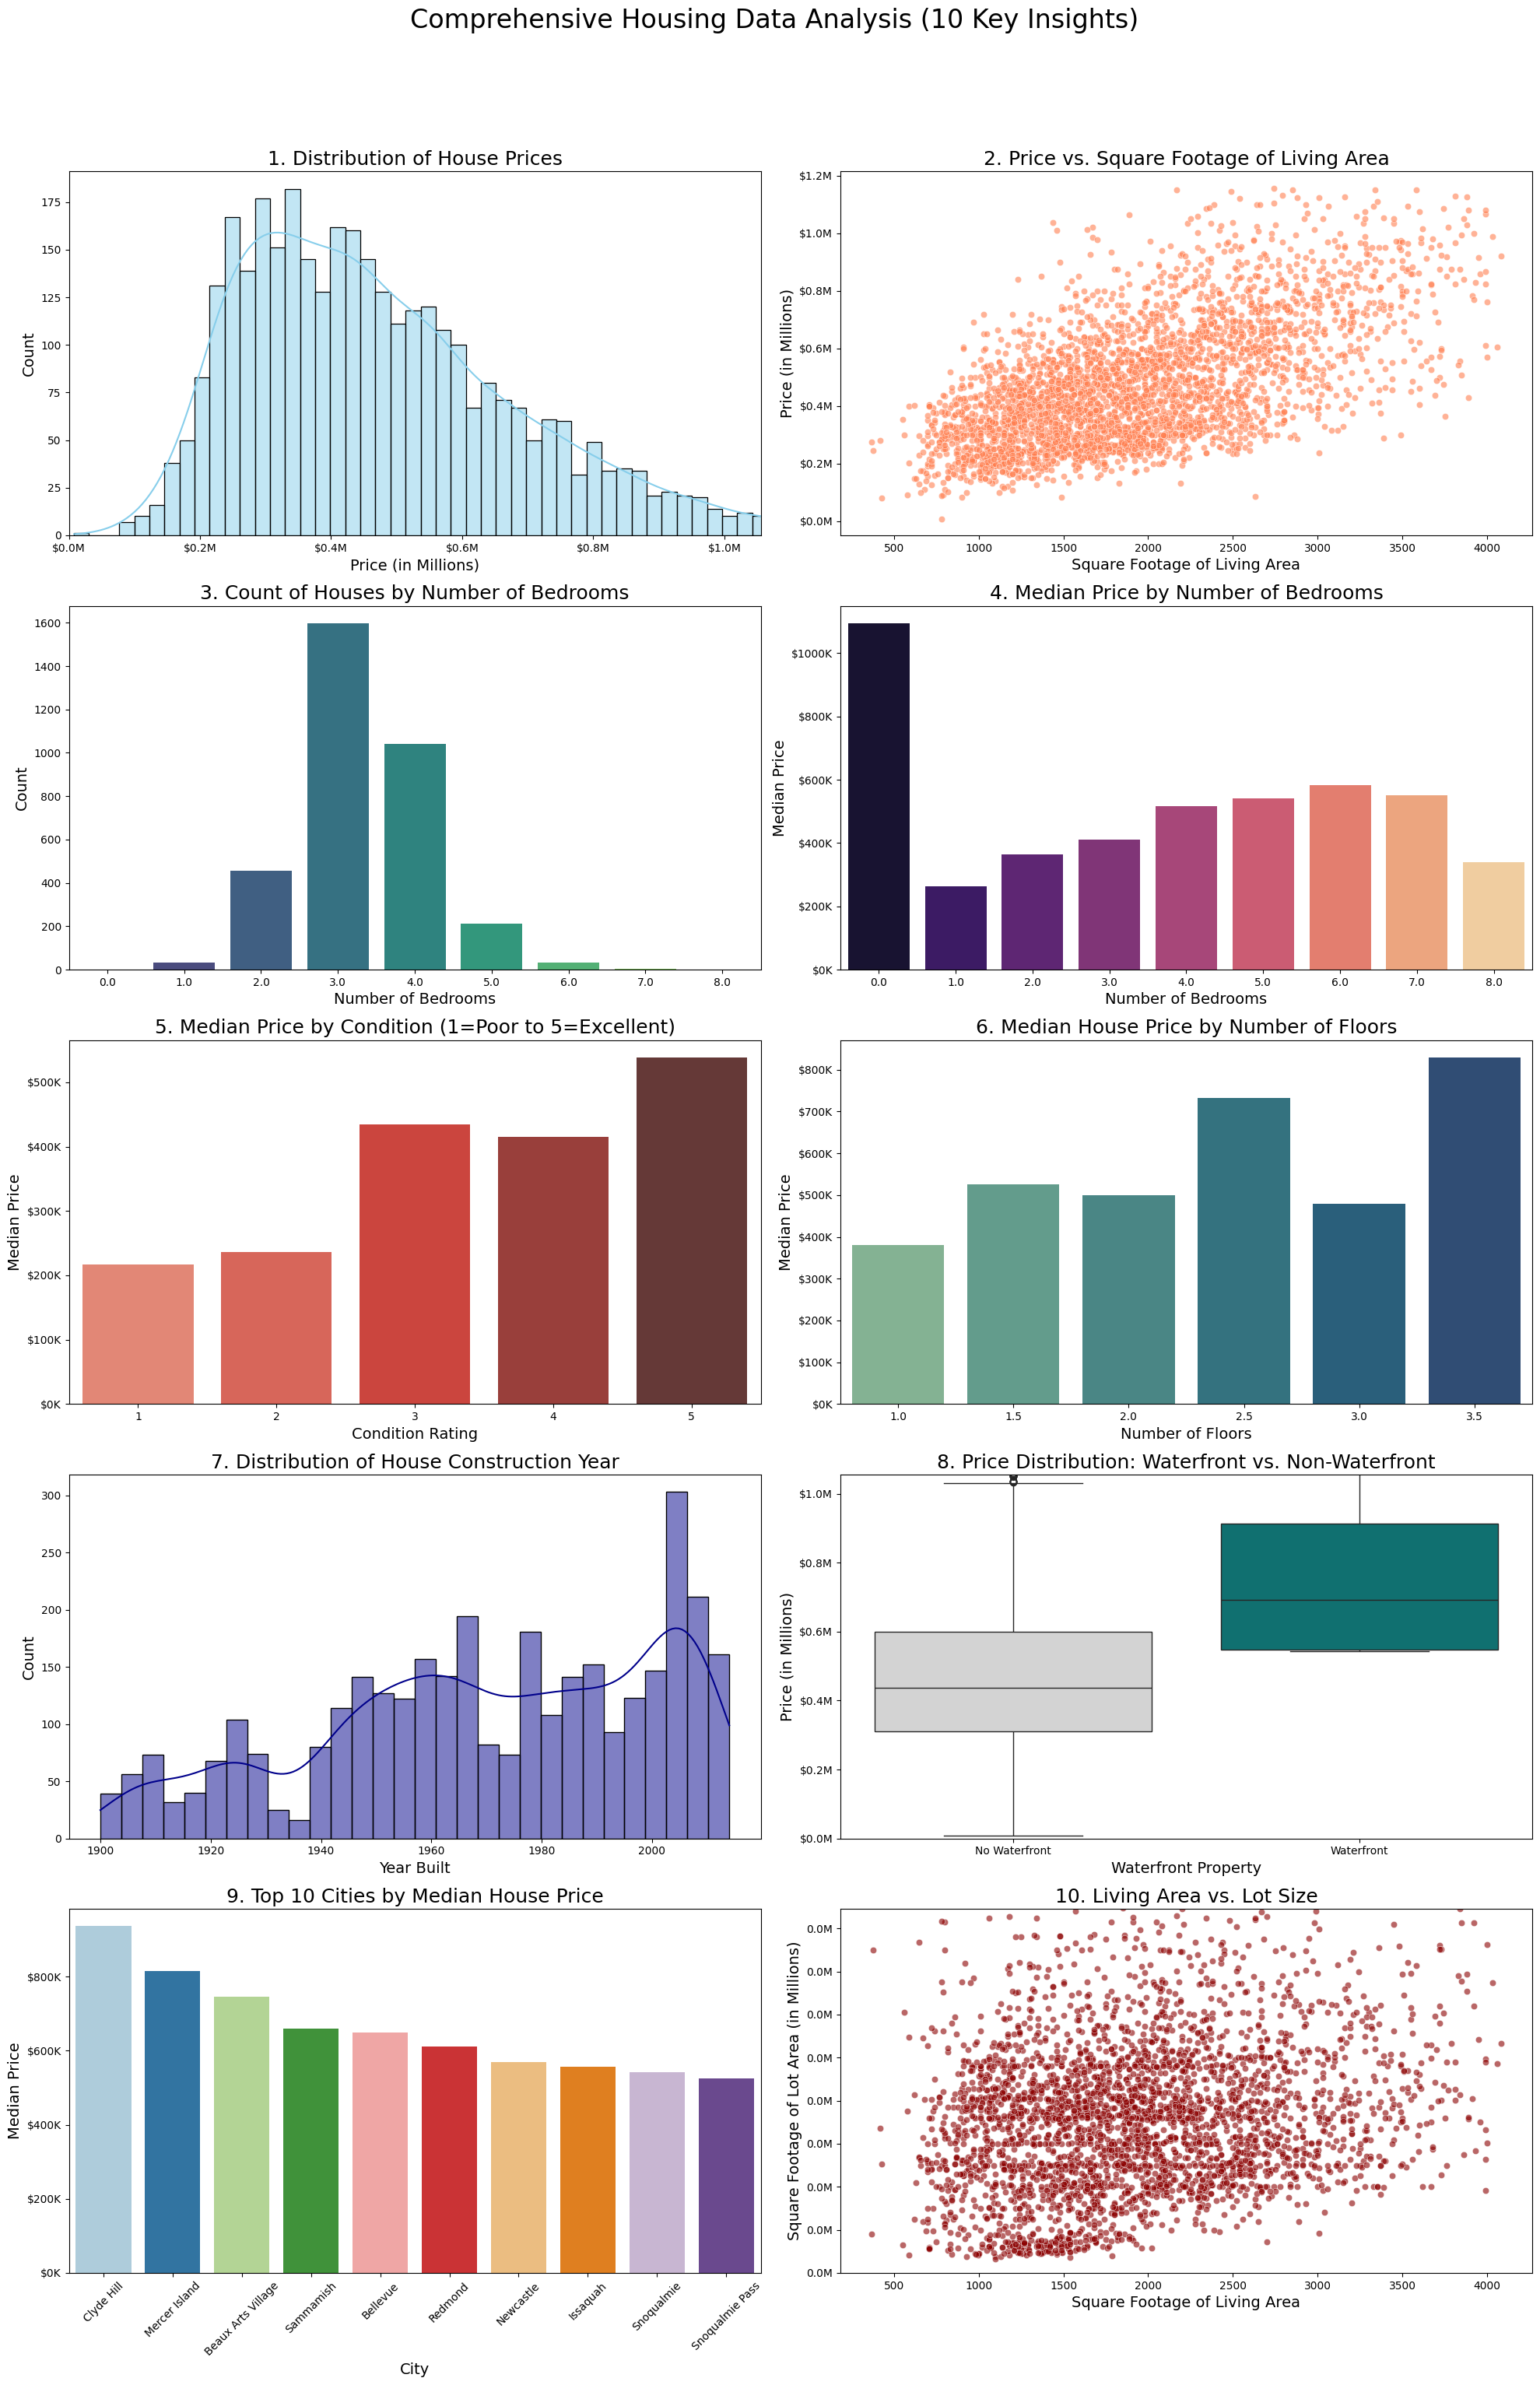

In [35]:
fig, axes = plt.subplots(5, 2, figsize=(20, 30))
fig.suptitle('Comprehensive Housing Data Analysis (10 Key Insights)', fontsize=24, y=1.02)

# Chart 1: Distribution of House Prices (Histogram with KDE)
sns.histplot(df_cleaned['price'], kde=True, bins=50, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('1. Distribution of House Prices', fontsize=18)
axes[0, 0].set_xlabel('Price (in Millions)', fontsize=14)
axes[0, 0].set_ylabel('Count', fontsize=14)
axes[0, 0].ticklabel_format(style='plain', axis='x')
axes[0, 0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x/1e6:.1f}M'))
axes[0, 0].set_xlim(0, df_cleaned['price'].quantile(0.99))

# Chart 2: Price vs. Square Footage of Living Area (Scatter Plot)
sns.scatterplot(x='sqft_living', y='price', data=df_cleaned, ax=axes[0, 1], alpha=0.6, color='coral')
axes[0, 1].set_title('2. Price vs. Square Footage of Living Area', fontsize=18)
axes[0, 1].set_xlabel('Square Footage of Living Area', fontsize=14)
axes[0, 1].set_ylabel('Price (in Millions)', fontsize=14)
axes[0, 1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x/1e6:.1f}M'))

# Chart 3: Count of Houses by Number of Bedrooms (Bar Chart)
bedroom_counts = df_cleaned['bedrooms'].value_counts().sort_index()
sns.barplot(x=bedroom_counts.index, y=bedroom_counts.values, ax=axes[1, 0], palette='viridis')
axes[1, 0].set_title('3. Count of Houses by Number of Bedrooms', fontsize=18)
axes[1, 0].set_xlabel('Number of Bedrooms', fontsize=14)
axes[1, 0].set_ylabel('Count', fontsize=14)

# Chart 4: Median Price by Number of Bedrooms (Bar Chart)
avg_price_bedrooms = df_cleaned.groupby('bedrooms')['price'].median().sort_values(ascending=False)
sns.barplot(x=avg_price_bedrooms.index, y=avg_price_bedrooms.values, ax=axes[1, 1], palette='magma')
axes[1, 1].set_title('4. Median Price by Number of Bedrooms', fontsize=18)
axes[1, 1].set_xlabel('Number of Bedrooms', fontsize=14)
axes[1, 1].set_ylabel('Median Price', fontsize=14)
axes[1, 1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x/1000:.0f}K'))

# Chart 5: Median Price by Condition (Bar Plot)
avg_price_condition = df_cleaned.groupby('condition')['price'].median().sort_index()
sns.barplot(x=avg_price_condition.index, y=avg_price_condition.values, ax=axes[2, 0], palette='Reds_d')
axes[2, 0].set_title('5. Median Price by Condition (1=Poor to 5=Excellent)', fontsize=18)
axes[2, 0].set_xlabel('Condition Rating', fontsize=14)
axes[2, 0].set_ylabel('Median Price', fontsize=14)
axes[2, 0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x/1000:.0f}K'))

# Chart 6: Median Price by Number of Floors (Bar Plot)
median_price_floors = df_cleaned.groupby('floors')['price'].median().sort_values(ascending=False)
sns.barplot(x=median_price_floors.index, y=median_price_floors.values, ax=axes[2, 1], palette='crest')
axes[2, 1].set_title('6. Median House Price by Number of Floors', fontsize=18)
axes[2, 1].set_xlabel('Number of Floors', fontsize=14)
axes[2, 1].set_ylabel('Median Price', fontsize=14)
axes[2, 1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x/1000:.0f}K'))


# Chart 7: Distribution of Year Built (Histogram)
sns.histplot(df_cleaned['yr_built'], bins=30, kde=True, ax=axes[3, 0], color='darkblue')
axes[3, 0].set_title('7. Distribution of House Construction Year', fontsize=18)
axes[3, 0].set_xlabel('Year Built', fontsize=14)
axes[3, 0].set_ylabel('Count', fontsize=14)

# Chart 8: Waterfront (Yes/No) vs. Price (Box Plot)
df_cleaned['waterfront_label'] = df_cleaned['waterfront'].map({0: 'No Waterfront', 1: 'Waterfront'})
sns.boxplot(x='waterfront_label', y='price', data=df_cleaned, ax=axes[3, 1], palette=['lightgray', 'teal'])
axes[3, 1].set_title('8. Price Distribution: Waterfront vs. Non-Waterfront', fontsize=18)
axes[3, 1].set_xlabel('Waterfront Property', fontsize=14)
axes[3, 1].set_ylabel('Price (in Millions)', fontsize=14)
axes[3, 1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x/1e6:.1f}M'))
axes[3, 1].set_ylim(0, df_cleaned['price'].quantile(0.99))

# Chart 9: Top 10 Cities by Median House Price (Bar Chart)
top_cities_price = df_cleaned.groupby('city')['price'].median().nlargest(10).sort_values(ascending=False)
sns.barplot(x=top_cities_price.index, y=top_cities_price.values, ax=axes[4, 0], palette='Paired')
axes[4, 0].set_title('9. Top 10 Cities by Median House Price', fontsize=18)
axes[4, 0].set_xlabel('City', fontsize=14)
axes[4, 0].set_ylabel('Median Price', fontsize=14)
axes[4, 0].tick_params(axis='x', rotation=45)
axes[4, 0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x/1000:.0f}K'))
plt.tight_layout(rect=[0, 0, 1, 0.98])

# Chart 10: Relationship between sqft_living and sqft_lot (Scatter Plot)
sns.scatterplot(x='sqft_living', y='sqft_lot', data=df_cleaned, ax=axes[4, 1], alpha=0.6, color='darkred')
axes[4, 1].set_title('10. Living Area vs. Lot Size', fontsize=18)
axes[4, 1].set_xlabel('Square Footage of Living Area', fontsize=14)
axes[4, 1].set_ylabel('Square Footage of Lot Area (in Millions)', fontsize=14)
axes[4, 1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
axes[4, 1].set_ylim(0, df_cleaned['sqft_lot'].quantile(0.99))

In [17]:
# Apply IQR Outlier Removal
iqr_features = ["price", "sqft_living", "sqft_lot"]
for feature in iqr_features:
    Q1 = df_cleaned[feature].quantile(0.25)
    Q3 = df_cleaned[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df_cleaned[(df_cleaned[feature] >= lower_bound) & (df_cleaned[feature] <= upper_bound)]

In [ ]:
# Drop non-feature and multicollinear columns
columns_to_drop = ["date", "street", "country", 'sqft_above', 'sqft_basement']
df_model = df_cleaned.drop(columns=columns_to_drop).reset_index(drop=True)


In [ ]:
# Define Features (X) and Target (y)
X = df_model.drop('price', axis=1)
y = df_model['price']

In [ ]:
# 2. Split Data (Needed for Target Encoding to prevent leakage)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# --- 3. Target Encoding (Train-Test Safe Implementation) ---
categorical_features = ['city', 'statezip']
for feature in categorical_features:
    # 1. Calculate target mean only on TRAINING data
    mean_map = y_train.groupby(X_train[feature]).mean()
    global_mean = y_train.mean()
    
    # 2. Apply encoding to X_train and X_test
    X_train[f'{feature}_encoded'] = X_train[feature].map(mean_map).fillna(global_mean)
    X_test[f'{feature}_encoded'] = X_test[feature].map(mean_map).fillna(global_mean)

In [ ]:

# Drop original categorical columns
X_train = X_train.drop(columns=categorical_features)
X_test = X_test.drop(columns=categorical_features)

# --- 4. Log Transform Target (y) ---
y_log_train = np.log(y_train)
y_log_test = np.log(y_test)


In [9]:
# Combine for CV later
X_encoded_full = pd.concat([X_train, X_test], ignore_index=True)
y_log_full = pd.concat([y_log_train, y_log_test], ignore_index=True)


# 5. Setup Pipeline and Evaluation
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])


In [ ]:
# Fit the pipeline on the log-transformed target
pipeline.fit(X_train, y_log_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [ ]:
# --- A. Single Test Score Evaluation ---
y_log_pred = pipeline.predict(X_test)
r2_log_single = r2_score(y_log_test, y_log_pred)

In [ ]:
# Back-transform predictions and target for MAE on original dollar scale
y_pred_dollar = np.exp(y_log_pred)
mae_dollar_single = mean_absolute_error(y_test, y_pred_dollar)

print("--- Single Test Split Results (Log Target Handled) ---")
print(f"R^2 Score (Log Scale): {r2_log_single:.4f}")
print(f"Mean Absolute Error (MAE) (Dollar Scale): ${mae_dollar_single:,.2f}\n")

--- Single Test Split Results (Log Target Handled) ---
R^2 Score (Log Scale): 0.7654
Mean Absolute Error (MAE) (Dollar Scale): $77,747.85



In [ ]:
# --- B. Cross-Validation Score Evaluation ---
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# R^2 Scores (Log Scale)
cv_r2_scores = cross_val_score(pipeline, X_encoded_full, y_log_full, cv=kf, scoring='r2')
mean_cv_r2_log = np.mean(cv_r2_scores)

In [14]:
# Custom scorer for back-transformed MAE (Dollar Scale)
def back_transformed_mae(y_true_log, y_pred_log):
    # MAE on the original dollar scale
    return mean_absolute_error(np.exp(y_true_log), np.exp(y_pred_log))

mae_scorer = make_scorer(back_transformed_mae, greater_is_better=False) # minimize MAE

# MAE Scores (Dollar Scale)
cv_mae_scores = cross_val_score(pipeline, X_encoded_full, y_log_full, cv=kf, scoring=mae_scorer)
# Since greater_is_better=False, we negate the mean to get the true MAE
mean_cv_mae_dollar = -np.mean(cv_mae_scores)

print("--- 5-Fold Cross-Validation Results ---")
print(f"Mean Cross-Validation R^2 Score (Log Scale): {mean_cv_r2_log:.4f}")
print(f"Mean Cross-Validation MAE Score (Dollar Scale): ${mean_cv_mae_dollar:,.2f}")

--- 5-Fold Cross-Validation Results ---
Mean Cross-Validation R^2 Score (Log Scale): 0.7506
Mean Cross-Validation MAE Score (Dollar Scale): $75,578.89
